## Build your own Naive Bayes classifier. Perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns

In [2]:
datapath = '../Datasets/yelp_labelled.txt'
feedback_raw = pd.read_csv(datapath, delimiter='\t', header=None)
feedback_raw.columns = ['message', 'feedback']

feature = pd.DataFrame()
sns.set_style('white')
feedback_raw.head(5)

,message,feedback
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
# does length of message determine feedback?
feature['message_length'] = feedback_raw['message'].str.len()
feature['feedback'] = feedback_raw['feedback']

In [4]:
# add space to msg before and after stmt to get first and last words 
feature['msg'] = ' ' + feedback_raw.message.str.replace('[^A-Za-z0-9\']+', ' ') + ' '

In [5]:
#find words that show up more frequently in negative feedbacks to build negative dictionary
dictionary = pd.DataFrame()
dictionary['negative'] = pd.Series(' '.join(feature[feature['feedback']==0].msg).lower().split()).value_counts()
dictionary['positive'] = pd.Series(' '.join(feature[feature['feedback']==1].msg).lower().split()).value_counts()
filtered_dictionary = np.where(dictionary['negative'] > dictionary['positive'], dictionary['negative'].index, None)
print(list(filter(lambda x: x != None, filtered_dictionary)))

['i', 'was', 'to', 'a', 'not', 'it', 'of', 'for', 'food', 'we', 'be', 'that', 'but', 'at', 'my', 'back', 'like', 'there', 'go', 'no', 'will', 'never', "don't", 'would', 'if', 'ever', 'up', 'again', 'from', 'your', 'only', 'one', 'much', 'did', 'got', 'out', "won't", 'what', 'worst', 'been', 'disappointed', 'think', 'me', 'being', "i've", 'going', 'more', 'eat', 'came', 'which', "i'm", 'us', 'or', 'when', 'better', 'too', 'get', 'wait', 'do', 'way', 'about', 'flavor', 'other', 'after', 'because', 'how', 'times', 'them', "didn't", 'than', 'over', 'another', 'ordered', 'before', 'salad', 'cold', 'then', 'burger', 'know', 'coming', 'can', 'quality', 'give', 'feel', 'people', 'any', 'enough', '2', 'eating', 'impressed', 'soon', 'down', 'sushi', 'meat', 'getting', 'bit', 'she', 'off', 'sure', 'few', 'said', 'meal', 'take', 'felt', 'tasted', 'many', 'nothing', 'lunch', 'next', 'around', '1', 'waiter', 'who', 'hot', "can't", 'table', 'dishes', 'done', 'hour', 'two', 'fries', 'shrimp', 'servers

In [6]:
#remove neutral/positive words from negative dictionary
neutral = ['was', 'for', 'that', 'there', 'your', 'from', 'what', 'like', "i've", "i'm", 'can', 'wife', 'dog', 'reviews', 'beans', 'green', "friend's", 'lobster', 'rice', 'fried']

In [7]:
#create negative dictionary excluding 2 letter words and neutral list
negative_dictionary = []
for word in filtered_dictionary:
    if (word != None):
        if ((len(word) > 2) & (word not in neutral)):
            negative_dictionary.append(word)
print(negative_dictionary)

['not', 'food', 'but', 'back', 'will', 'never', "don't", 'would', 'ever', 'again', 'only', 'one', 'much', 'did', 'got', 'out', "won't", 'worst', 'been', 'disappointed', 'think', 'being', 'going', 'more', 'eat', 'came', 'which', 'when', 'better', 'too', 'get', 'wait', 'way', 'about', 'flavor', 'other', 'after', 'because', 'how', 'times', 'them', "didn't", 'than', 'over', 'another', 'ordered', 'before', 'salad', 'cold', 'then', 'burger', 'know', 'coming', 'quality', 'give', 'feel', 'people', 'any', 'enough', 'eating', 'impressed', 'soon', 'down', 'sushi', 'meat', 'getting', 'bit', 'she', 'off', 'sure', 'few', 'said', 'meal', 'take', 'felt', 'tasted', 'many', 'nothing', 'lunch', 'next', 'around', 'waiter', 'who', 'hot', "can't", 'table', 'dishes', 'done', 'hour', 'two', 'fries', 'shrimp', 'servers', 'return', 'chips', 'extremely', 'enjoy', 'old', 'kept', 'bring', 'customer', 'talk', 'warm', "i'll", 'found', 'served', 'lot', 'see', 'vegetables', 'someone', 'real', 'gave', 'home', 'these', 

In [8]:
# keyword indicators of negative feedback
for key in negative_dictionary:
    # adding spaces around key to get word and not pattern matching.
    feature[str(key)] = feature.msg.str.contains(
        ' ' + str(key) + ' ', case=False
    )
feature.head(5)

,message_length,feedback,msg,not,food,but,back,will,never,don't,...,honest,received,stay,expected,bill,chewy,half,deserves,list,yet
0,24,1,Wow Loved this place,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,18,0,Crust is not good,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,41,0,Not tasty and the texture was just nasty,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,87,1,Stopped by during the late May bank holiday o...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,59,1,The selection on the menu was great and so we...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


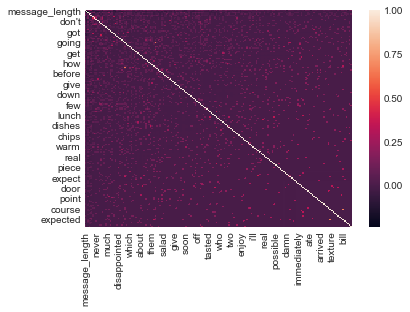

In [9]:
sns.set_style('white')
sns.heatmap(feature.corr())
plt.show()

In [10]:
data = feature[negative_dictionary]
target = feature['feedback']

# data is boolean, so import Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit model to data
bnb.fit(data, target)

#classify, store results in variable
y_pred = bnb.predict(data)

#display
print("number of mislabeled points out of total {} points: {}".format(
    data.shape[0], (target != y_pred).sum()
))

number of mislabeled points out of total 1000 points: 293


In [11]:
#create 2nd classifier - tweaking the neutral dictionary, less specific negative dicionary
neutral = ['was', 'for', 'that', 'there', 'your', 'from', 'what', 'like', "i've", "i'm", 'can', 'wife', 'dog', 'reviews', 'beans', 'green', "friend's", 'lobster', 'rice', 'fried',
          'lunch', 'about', 'them', 'than', 'she', 'said', 'who', 'talk', 'chips', 'soup', 'husband', 'vegetables', 'fish', 'texture']

#create negative dictionary excluding 2 letter words and neutral list
negative_dictionary2 = []
for word in filtered_dictionary:
    if (word != None):
        if ((len(word) > 2) & (word not in neutral)):
            negative_dictionary2.append(word)

# keyword indicators of negative feedback
for key in negative_dictionary2:
    # adding spaces around key to get word and not pattern matching.
    feature[str(key)] = feature.msg.str.contains(
        ' ' + str(key) + ' ', case=False
    )

data = feature[negative_dictionary2]
target = feature['feedback']

# data is boolean, so import Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit model to data
bnb.fit(data, target)

#classify, store results in variable
y_pred = bnb.predict(data)

#display
print("number of mislabeled points out of total {} points: {}".format(
    data.shape[0], (target != y_pred).sum()
))

number of mislabeled points out of total 1000 points: 299


In [12]:
#create 3rd classifier - limit from all possible words to a range of top 70 words only
dictionary = pd.DataFrame()
dictionary['negative'] = pd.Series(' '.join(feature[feature['feedback']==0].msg).lower().split()).value_counts()[:70]
dictionary['positive'] = pd.Series(' '.join(feature[feature['feedback']==1].msg).lower().split()).value_counts()[:70]
filtered_dictionary = np.where(dictionary['negative'] > dictionary['positive'], dictionary['negative'].index, None)

#remove neutral/positive words from negative dictionary
neutral = ['was', 'for', 'that', 'there', 'your', 'from', 'what', 'like', "i've", "i'm", 'can', 'wife', 'dog', 'reviews', 'beans', 'green', "friend's", 'lobster', 'rice', 'fried']

#create negative dictionary excluding 2 letter words and neutral list
negative_dictionary3 = []
for word in filtered_dictionary:
    if (word != None):
        if ((len(word) > 2) & (word not in neutral)):
            negative_dictionary3.append(word)

# keyword indicators of negative feedback
for key in negative_dictionary3:
    # adding spaces around key to get word and not pattern matching.
    feature[str(key)] = feature.msg.str.contains(
        ' ' + str(key) + ' ', case=False
    )
    
data = feature[negative_dictionary3]
target = feature['feedback']

# data is boolean, so import Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit model to data
bnb.fit(data, target)

#classify, store results in variable
y_pred = bnb.predict(data)

#display
print("number of mislabeled points out of total {} points: {}".format(
    data.shape[0], (target != y_pred).sum()
))

number of mislabeled points out of total 1000 points: 405


In [13]:
#create 4th classifier - only limit 1 letter and neutral words
dictionary = pd.DataFrame()
dictionary['negative'] = pd.Series(' '.join(feature[feature['feedback']==0].msg).lower().split()).value_counts()
dictionary['positive'] = pd.Series(' '.join(feature[feature['feedback']==1].msg).lower().split()).value_counts()
filtered_dictionary = np.where(dictionary['negative'] > dictionary['positive'], dictionary['negative'].index, None)

#remove neutral/positive words from negative dictionary
neutral = ['was', 'for', 'that', 'there', 'your', 'from', 'what', 'like', "i've", "i'm", 'can', 'wife', 'dog', 'reviews', 'beans', 'green', "friend's", 'lobster', 'rice', 'fried']

#create negative dictionary excluding 2 letter words and neutral list
negative_dictionary4 = []
for word in filtered_dictionary:
    if (word != None):
        if ((len(word) > 1) & (word not in neutral)):
            negative_dictionary4.append(word)

# keyword indicators of negative feedback
for key in negative_dictionary4:
    # adding spaces around key to get word and not pattern matching.
    feature[str(key)] = feature.msg.str.contains(
        ' ' + str(key) + ' ', case=False
    )
    
data = feature[negative_dictionary4]
target = feature['feedback']

# data is boolean, so import Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit model to data
bnb.fit(data, target)

#classify, store results in variable
y_pred = bnb.predict(data)

#display
print("number of mislabeled points out of total {} points: {}".format(
    data.shape[0], (target != y_pred).sum()
))

number of mislabeled points out of total 1000 points: 303


In [14]:
#5th classifier - a simple list of words for the negative dictionary
negative_dictionary5 = ['not', 'no', 'never', "didn't", 'ever', 'again', "won't", 'worst', 'disappointed', "didn't", "can't", 'damn', 'bill', "couldn't", 'expected', 'review', 'reviews']

# keyword indicators of negative feedback
for key in negative_dictionary5:
    # adding spaces around key to get word and not pattern matching.
    feature[str(key)] = feature.msg.str.contains(
        ' ' + str(key) + ' ', case=False
    )

data = feature[negative_dictionary5]
target = feature['feedback']

# data is boolean, so import Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit model to data
bnb.fit(data, target)

#classify, store results in variable
y_pred = bnb.predict(data)

#display
print("number of mislabeled points out of total {} points: {}".format(
    data.shape[0], (target != y_pred).sum()
))

number of mislabeled points out of total 1000 points: 360


<i>Do any of your classifiers seem to overfit?</i><br>
All of my classifiers sans 5th classifier may have an issue with overfitting. Because I try to procedurally generate the features, it has a tendency to create a lot of features based on how many words are more prevalent in the negative messages than in the positive messages.

<i>Which seem to perform the best? Why?><i><br>
Yet out of all of these, my original classifier seems to perform the best, with the second best performing iteration was the one that had less specific negative dictionary. It may be because it was just fine tuned for this specific exercise. This becomes apparent in the third classifier, where I had an error of 408 mismatched words when I limited the number of top words I was comparing.

<i>Which features seemed to be most impactful to performance?</i><br>
Because I tried to create features procedurally instead of different types of features (words, upper case, etc.) I would say that my features are all equally impactful. Rather, the thing that appeared to impact my performance the most within this procedurally generated list is that it is fine tuned to pick out words based on this dataset. While the classifier's procedurally generated list can be used for different datasets by rebuilding it every time, it runs into the issue of overfitting each time.